This file performs linear regression, regularized linear regression, linear regression with polynomial features, and regularized linear regression with polynomial features.

In [65]:
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
# Load function for computing model evaluation metrics
def metrics(y_test, y_test_hat):
    '''
    Compute and print model evaluation metrics.
    '''
    mae = mean_absolute_error(y_test, y_test_hat)
    mse = mean_squared_error(y_test, y_test_hat)
    r2 = r2_score(y_test, y_test_hat)
    print("""\n Evaluation metrics: \n
             MAE: {} \n
             MSE: {} \n
             R2: {} \n""".format(mae, mse, r2))
    
    # Print the descriptive statistics for the predictive error of low- and high-priced homes, respectively
    error = y_test - y_test_hat
    low_stats = error[y_test <= low_cluster_threshold].describe()
    high_stats = error[y_test > high_cluster_threshold].describe()
    print("""Descriptive statistics for the predictive error among low-priced homes: \n {} \n
             Descriptive statistics for the predictive error among high-priced homes: \n {}""".format(low_stats, high_stats))

In [3]:
# Import training and test sets
data_train = pd.read_csv('../data/data_train.csv')
data_test = pd.read_csv('../data/data_test.csv')

# Select variables
y_train = data_train['SalePrice']
x_train = data_train.drop(['SalePrice'], axis=1)

y_test = data_test['SalePrice']
x_test = data_test.drop(['SalePrice'], axis=1)

Min value of cluster 1 is:  34900
Max value of cluster 1 is:  180500
Min value of cluster 2 is:  299800
Max value of cluster 2 is:  755000
Min value of cluster 3 is:  181000
Max value of cluster 3 is:  297000


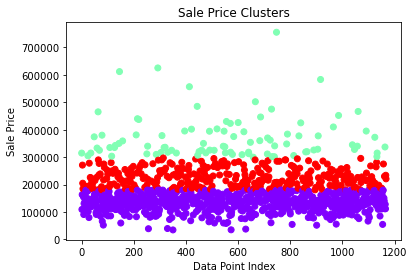

In [66]:
# Group homes into three groups: low-priced, medium-priced, and high-priced
# We will use these groups to examine the fairness of our models
cluster = KMeans(n_clusters=3)
cluster.fit(y_train.values.reshape(-1,1))

for i in range(3):
    print('Min value of cluster', i+1, 'is: ', y_train[cluster.labels_==i].min())
    print('Max value of cluster', i+1, 'is: ', y_train[cluster.labels_==i].max())
    
colormap = cm.rainbow(np.linspace(0, 1, len(cluster.cluster_centers_)))
plt.scatter(y_train.index, y_train, c=colormap[cluster.labels_])
plt.title('Sale Price Clusters')
plt.ylabel('Sale Price')
plt.xlabel('Data Point Index')
plt.show()
    
low_cluster_threshold = y_train.max()
high_cluster_threshold = y_train.min()
for i in range(3):
    cluster_threshold = y_train[cluster.labels_==i].max()
    if cluster_threshold < low_cluster_threshold:
        low_cluster_threshold = cluster_threshold
    if cluster_threshold > high_cluster_threshold and cluster_threshold < y_train.max():
        high_cluster_threshold = cluster_threshold

        BsmtQual_TA   BsmtQual_Gd  GarageType_Attchd  GarageType_Detchd  \
coeff -5.384404e+15 -5.338799e+15      -4.211323e+15      -3.808664e+15   

          BsmtUnfSF    BsmtFinSF1   BsmtQual_Ex  GarageType_BuiltIn  \
coeff -3.046600e+15 -3.029450e+15 -2.943044e+15       -2.090583e+15   

       BsmtExposure_No   BsmtQual_Fa  Exterior1st_CBlock  BsmtExposure_Av  \
coeff    -1.690742e+15 -1.654863e+15       -1.457663e+15    -1.268628e+15   

         BsmtFinSF2  BsmtExposure_Gd  BsmtExposure_Mn  GarageType_Basment  \
coeff -1.087758e+15    -1.023486e+15    -9.597689e+14       -9.339204e+14   

       BsmtFinType1_Unf  BsmtFinType1_GLQ  BsmtFinType1_ALQ  \
coeff     -8.332959e+14     -8.169812e+14     -6.430237e+14   

       GarageType_2Types  GarageType_CarPort  BsmtFinType1_BLQ  \
coeff      -6.135099e+14       -5.602963e+14     -5.569854e+14   

       BsmtFinType1_Rec  BsmtFinType1_LwQ  Exterior2nd_AsphShn      2ndFlrSF  \
coeff     -5.212526e+14     -3.876854e+14        -3.2213

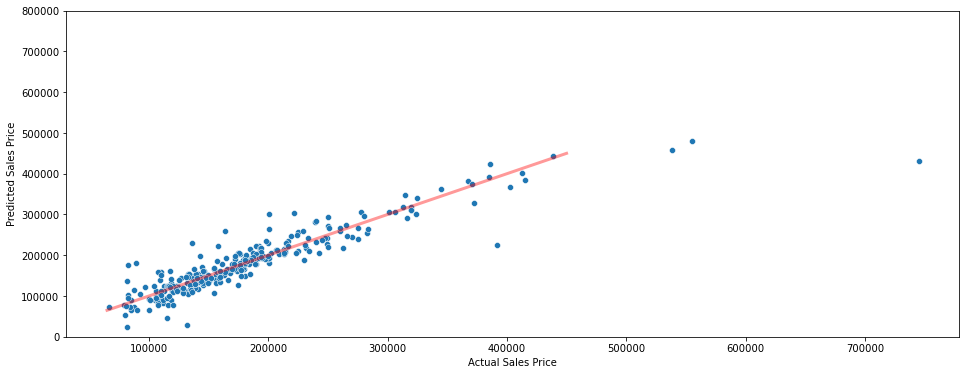

In [62]:
pd.set_option('display.max_columns', None)

# Fit the linear regression
pipeline = Pipeline([
    ('norm', StandardScaler()),
    ('regr', linear_model.LinearRegression()),
])
pipeline.fit(x_train, y_train)

# Print coefficients
coeffs = pd.DataFrame(data=np.reshape(pipeline['regr'].coef_, (1,-1)), columns=x_train.columns, index=['coeff'] )
print(coeffs.sort_values(by='coeff', axis=1))

# Predict housing values for the test set
y_test_hat = pipeline.predict(x_test)

# Compute model evaluation metrics
metrics(y_test, y_test_hat)

# Plot actual vs. predicted
plt.figure(figsize=(16,6))
plot = sns.scatterplot(x=y_test, y=y_test_hat)
plot.set(xlabel='Actual Sales Price', ylabel='Predicted Sales Price')
plt.plot(np.array([65000.,450000.]), np.array([65000.,450000.]), color='red', alpha=0.4, linewidth=3)
plt.ylim((0,800000))
plt.show()

C:\Users\Carly\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1795724058.3077698, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent(
C:\Users\Carly\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2238820919.8262024, tolerance: 615054159.5739737
  model = cd_fast.enet_coordinate_descent(


                    params  mean_test_neg_mean_squared_error  \
0    {'Lasso__alpha': 0.1}                     -1.059283e+09   
1      {'Lasso__alpha': 1}                     -1.051541e+09   
2     {'Lasso__alpha': 10}                     -9.939431e+08   
3    {'Lasso__alpha': 100}                     -8.722972e+08   
4    {'Lasso__alpha': 250}                     -8.125807e+08   
5    {'Lasso__alpha': 300}                     -8.049731e+08   
6    {'Lasso__alpha': 350}                     -8.002319e+08   
10  {'Lasso__alpha': 1000}                     -7.959250e+08   
7    {'Lasso__alpha': 450}                     -7.958456e+08   
9    {'Lasso__alpha': 550}                     -7.949650e+08   
8    {'Lasso__alpha': 500}                     -7.948743e+08   

    mean_test_neg_mean_absolute_error  mean_test_r2  
0                       -20556.365108      0.830219  
1                       -20486.875270      0.831468  
2                       -19919.292731      0.840674  
3              

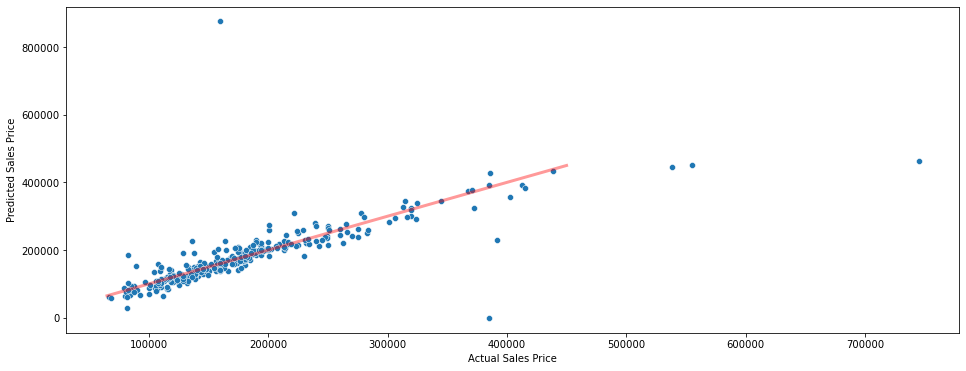

                    params  mean_test_neg_mean_squared_error  \
0    {'Ridge__alpha': 0.1}                     -1.048093e+09   
1      {'Ridge__alpha': 1}                     -1.016545e+09   
2     {'Ridge__alpha': 10}                     -9.483707e+08   
10  {'Ridge__alpha': 1000}                     -8.847113e+08   
3    {'Ridge__alpha': 100}                     -8.385169e+08   
9    {'Ridge__alpha': 550}                     -8.288659e+08   
8    {'Ridge__alpha': 500}                     -8.240615e+08   
7    {'Ridge__alpha': 450}                     -8.197832e+08   
6    {'Ridge__alpha': 350}                     -8.134704e+08   
4    {'Ridge__alpha': 250}                     -8.122717e+08   
5    {'Ridge__alpha': 300}                     -8.119878e+08   

    mean_test_neg_mean_absolute_error  mean_test_r2  
0                       -20475.867373      0.831971  
1                       -20170.313653      0.837079  
2                       -19333.572531      0.848057  
10             

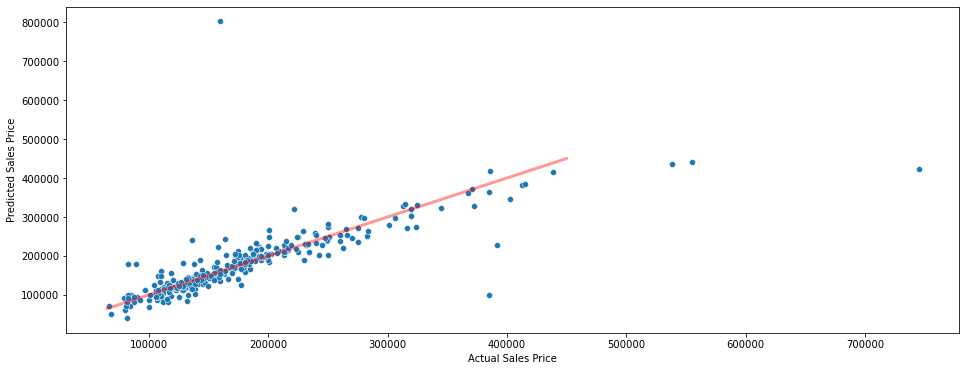

                          params  mean_test_neg_mean_squared_error  \
10  {'Elastic Net__alpha': 1000}                     -5.916895e+09   
9    {'Elastic Net__alpha': 550}                     -5.719164e+09   
8    {'Elastic Net__alpha': 500}                     -5.677021e+09   
7    {'Elastic Net__alpha': 450}                     -5.626360e+09   
6    {'Elastic Net__alpha': 350}                     -5.486543e+09   
5    {'Elastic Net__alpha': 300}                     -5.386240e+09   
4    {'Elastic Net__alpha': 250}                     -5.251961e+09   
3    {'Elastic Net__alpha': 100}                     -4.297317e+09   
2     {'Elastic Net__alpha': 10}                     -1.458319e+09   
0    {'Elastic Net__alpha': 0.1}                     -8.770090e+08   
1      {'Elastic Net__alpha': 1}                     -8.211717e+08   

    mean_test_neg_mean_absolute_error  mean_test_r2  
10                      -56201.668210      0.033217  
9                       -55118.417429      0.065814

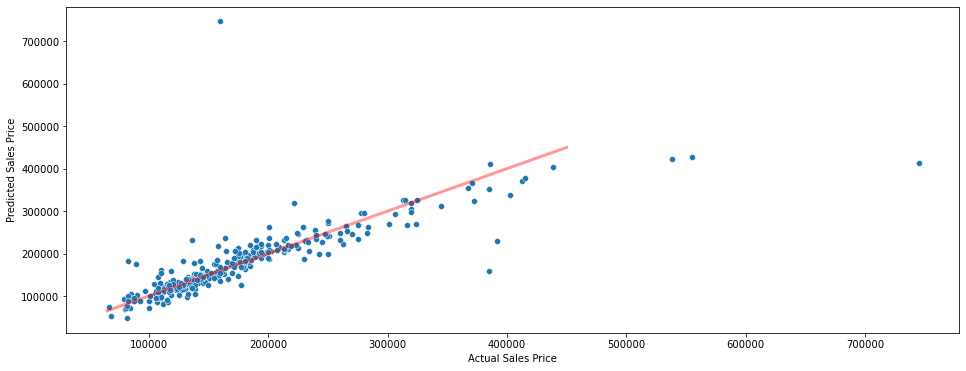

In [4]:
# Fit a regularized linear regression model
models = [('Lasso', linear_model.Lasso(max_iter=100000)),
           ('Ridge', linear_model.Ridge(max_iter=100000)),
           ('Elastic Net', linear_model.ElasticNet(max_iter=100000))]

for model_name, model in models:
    params = {model_name + '__alpha' : (0.1,1,10,100,250,300,350,450,500,550,1000)}
    pipeline = Pipeline([
        ('norm', StandardScaler()),
        (model_name, model)
    ])
    gs = GridSearchCV(estimator=pipeline, 
                      param_grid=params, 
                      cv=5,
                      scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                      refit='neg_mean_squared_error')
    gs.fit(x_train, y_train)
    # Output results
    results = pd.DataFrame(gs.cv_results_)
    results = results.sort_values(by=['mean_test_neg_mean_squared_error'])
    print(results[['params', 'mean_test_neg_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'mean_test_r2']])
    # Output the alpha that gives the best fit for the model
    print("Best ", model_name, " model:")
    print(gs.best_params_)
    # Print coefficients
    coeffs = pd.DataFrame(data=np.reshape(gs.best_estimator_[model_name].coef_, (1,-1)), columns=x_train.columns, index=['coeff'] )
    print(coeffs.sort_values(by='coeff', axis=1))
    if model_name == 'Lasso':
        lasso_coeffs = coeffs
    # Predict housing values for the test set using the best model
    y_test_hat = gs.predict(x_test)
    # Compute model evaluation metrics for the best model
    metrics(y_test, y_test_hat)
    # Plot actual vs. predicted
    plt.figure(figsize=(16,6))
    plot = sns.scatterplot(x=y_test, y=y_test_hat)
    plot.set(xlabel='Actual Sales Price', ylabel='Predicted Sales Price')
    plt.plot(np.array([65000.,450000.]), np.array([65000.,450000.]), color='red', alpha=0.4, linewidth=3)
    plt.show()

In [5]:
# The next block fails if we keep all variables, so we instead drop variables based on the results of the models above.
# Above, the regularized linear models had lower mean squared error than the non-regularized linear model.
# The Elastic Net and Ridge models only dropped five variables, so we choose to
# drop the variables that have a coefficient of zero in the Lasso model.

#pd.set_option('mode.chained_assignment', None)

cols_to_drop = lasso_coeffs.columns[(lasso_coeffs==0).iloc[0]].to_list()

# Make sure we only drop an ordinal variable's dummy if we drop ALL of that variable's dummies
#ordinal_var_counts_total = {'GarageYrBlt' : 0, 'LandSlope' : 0, 'ExterQual' : 0, 'ExterCond' : 0,
#                            'BsmtQual' : 0, 'BsmtCond' : 0, 'BsmtExposure' : 0, 'BsmtFinType1' : 0,
#                            'BsmtFinType2' : 0, 'HeatingQC' : 0, 'KitchenQual' : 0, 'Functional' : 0,
#                            'FireplaceQu' : 0, 'GarageFinish' : 0, 'GarageQual' : 0, 'GarageCond' : 0,
#                            'PoolQC' : 0, 'Fence' : 0, 'MoSold' : 0, 'YrSold' : 0}
#ordinal_var_counts_drop = copy.deepcopy(ordinal_var_counts_total)

#for col in x_train.columns:
#    prefix = col.split('_')[0]
#    if prefix in ordinal_var_counts_total.keys():
#        ordinal_var_counts_total[prefix] += 1
#for col in cols_to_drop:
#    prefix = col.split('_')[0]
#    if prefix in ordinal_var_counts_drop.keys():
#        ordinal_var_counts_drop[prefix] += 1

x_train_trunc = x_train.copy(deep=True)
x_test_trunc = x_test.copy(deep=True)

x_train_trunc.drop(cols_to_drop, axis=1, inplace=True)
x_test_trunc.drop(cols_to_drop, axis=1, inplace=True)

#for col in cols_to_drop:
#    prefix = col.split('_')[0]
#    if prefix in ordinal_var_counts_total:
#        if ordinal_var_counts_total[prefix] == ordinal_var_counts_drop[prefix]:
#            x_train_trunc.drop([col], axis=1, inplace=True)
#            x_test_trunc.drop([col], axis=1, inplace=True)
#    else:
#        x_train_trunc.drop([col], axis=1, inplace=True)
#        x_test_trunc.drop([col], axis=1, inplace=True)

                params  mean_test_neg_mean_squared_error  \
1  {'poly__degree': 3}                     -3.321987e+33   
0  {'poly__degree': 2}                     -4.809928e+27   

   mean_test_neg_mean_absolute_error  mean_test_r2  
1                      -7.708579e+15 -6.201724e+23  
0                      -1.660048e+13 -8.700435e+17  
Best linear model with polynomial features:
{'poly__degree': 2}
       Condition2_RRAe^2  Exterior1st_BrkComm^2  GarageYrBlt_1927.0^2  \
coeff      -1.246203e+12          -1.140070e+12         -1.129212e+12   

       SaleType_CWD^2   PoolQC_Ex^2  Utilities_NoSeWa^2  \
coeff   -8.557509e+11 -6.956892e+11       -5.160177e+11   

       GarageYrBlt_1918.0 PoolQC_Ex  RoofMatl_Membran^2  \
coeff                 -4.920556e+11       -4.174616e+11   

       Exterior1st_BrkComm Functional_Mod  Street_Grvl GarageType_2Types  \
coeff                       -3.270248e+11                  -3.226139e+11   

       GarageYrBlt_1924.0 GarageCond_Fa  BsmtCond_Fa Garag

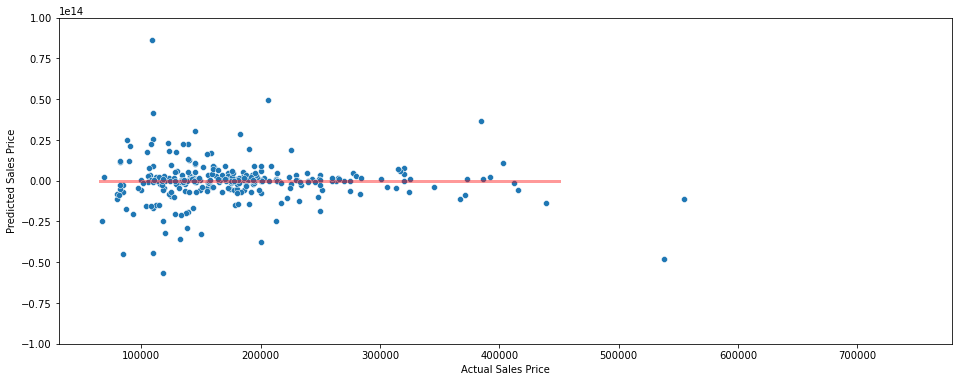

In [126]:
# Fit linear model with polynomial features
params = {'poly__degree' : (2,3)}
pipeline = Pipeline([
    ('norm', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('regr', linear_model.LinearRegressor(penalty=None)), # using stochastic gradient descent due to memory error
])
gs = GridSearchCV(estimator=pipeline, 
                  param_grid=params, 
                  cv=5,
                  scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                  refit='neg_mean_squared_error')
gs.fit(x_train_trunc, y_train)

# Output results
results = pd.DataFrame(gs.cv_results_)
results = results.sort_values(by=['mean_test_neg_mean_squared_error'])
print(results[['params', 'mean_test_neg_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'mean_test_r2']])

# Output the number of degrees that gives the best fit for the polynomial model
print('Best linear model with polynomial features:')
print(gs.best_params_)

# Print coefficients
coeffs = pd.DataFrame(data=np.reshape(gs.best_estimator_['regr'].coef_, (1,-1)),
                      columns=gs.best_estimator_['poly'].get_feature_names(x_train_trunc.columns), index=['coeff'] )
print(coeffs.sort_values(by='coeff', axis=1))

# Predict housing values for the test set using the best polynomial model
y_test_hat = gs.predict(x_test_trunc)

# Compute model evaluation metrics for the best polynomial model
metrics(y_test, y_test_hat)

# Plot actual vs. predicted
plt.figure(figsize=(16,6))
plot = sns.scatterplot(x=y_test, y=y_test_hat)
plot.set(xlabel='Actual Sales Price', ylabel='Predicted Sales Price')
plt.plot(np.array([65000.,450000.]), np.array([65000.,450000.]), color='red', alpha=0.4, linewidth=3)
plt.ylim((-100000000000000,100000000000000))
plt.show()

                                      params  \
0  {'Lasso__alpha': 1150, 'poly__degree': 2}   
1  {'Lasso__alpha': 1200, 'poly__degree': 2}   
3  {'Lasso__alpha': 1350, 'poly__degree': 2}   
2  {'Lasso__alpha': 1300, 'poly__degree': 2}   

   mean_test_neg_mean_squared_error  mean_test_neg_mean_absolute_error  \
0                     -7.694161e+08                      -14858.055310   
1                     -7.683122e+08                      -14855.215119   
3                     -7.677224e+08                      -14856.949225   
2                     -7.675634e+08                      -14852.848441   

   mean_test_r2  
0      0.876277  
1      0.876453  
3      0.876583  
2      0.876593  
Best  Lasso  model with polynomial features:
{'Lasso__alpha': 1300, 'poly__degree': 2}
       BsmtQual_Ex MoSold_2  MasVnrType_BrkFace GarageYrBlt_2009.0  \
coeff          -1719.501736                            -1631.43291   

       MSZoning_RM^2  Exterior1st_Wd Sdng^2  Condition1_PosA Functiona

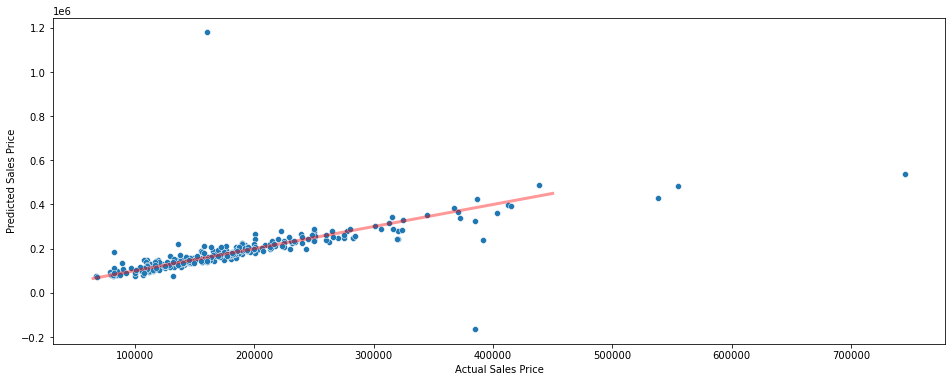

                                      params  \
3  {'Ridge__alpha': 1350, 'poly__degree': 2}   
2  {'Ridge__alpha': 1300, 'poly__degree': 2}   
0  {'Ridge__alpha': 1150, 'poly__degree': 2}   
1  {'Ridge__alpha': 1200, 'poly__degree': 2}   

   mean_test_neg_mean_squared_error  mean_test_neg_mean_absolute_error  \
3                     -1.412886e+09                      -23251.143185   
2                     -1.412693e+09                      -23224.355509   
0                     -1.412661e+09                      -23154.314446   
1                     -1.412572e+09                      -23175.259912   

   mean_test_r2  
3      0.773664  
2      0.773721  
0      0.773804  
1      0.773792  
Best  Ridge  model with polynomial features:
{'Ridge__alpha': 1200, 'poly__degree': 2}
       MSSubClass_30^2  MSZoning_RM^2  MedIncome UnempRate  \
coeff     -1135.840491    -1132.34018          -913.900447   

       UnempRate SchoolRating  Foundation_CBlock  SaleCondition_Abnorml^2  \
coeff    

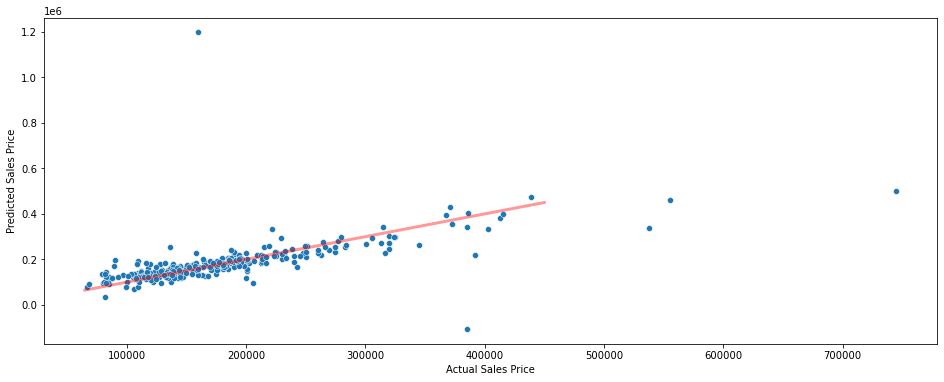

                                            params  \
3  {'Elastic Net__alpha': 1350, 'poly__degree': 2}   
2  {'Elastic Net__alpha': 1300, 'poly__degree': 2}   
1  {'Elastic Net__alpha': 1200, 'poly__degree': 2}   
0  {'Elastic Net__alpha': 1150, 'poly__degree': 2}   

   mean_test_neg_mean_squared_error  mean_test_neg_mean_absolute_error  \
3                     -4.752281e+09                      -51286.739786   
2                     -4.716206e+09                      -51106.089273   
1                     -4.638373e+09                      -50711.167843   
0                     -4.596302e+09                      -50494.885625   

   mean_test_r2  
3      0.221701  
2      0.227564  
1      0.240216  
0      0.247056  
Best  Elastic Net  model with polynomial features:
{'Elastic Net__alpha': 1150, 'poly__degree': 2}
       MSZoning_C (all)^2  MSSubClass_30^2  ExterQual_Fa^2  Foundation_Slab^2  \
coeff         -124.783166      -112.189227     -102.578389         -98.625239   

      

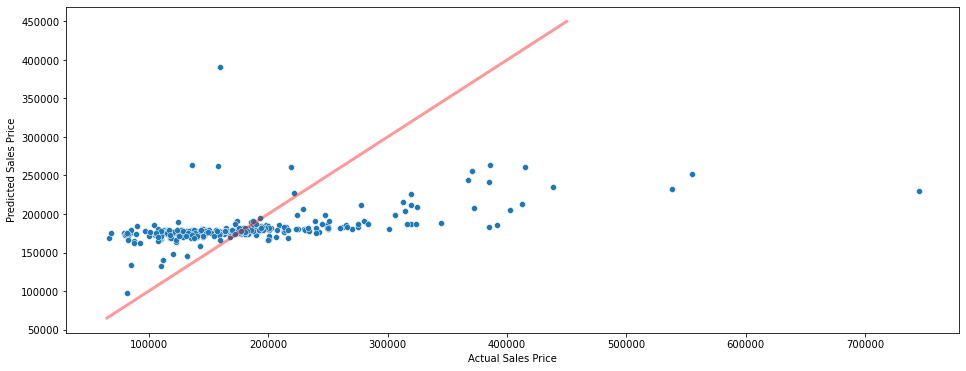

In [13]:
# The linear regression model with polynomial features of degree 2 performed best above, so we will regularize this model.
for model_name, model in models:
    params = {'poly__degree' : (2,),
              model_name + '__alpha' : (0.1,1,10,1150,1200,1250,1300,1350)}
    pipeline = Pipeline([
        ('norm', StandardScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        (model_name, model)
    ])
    gs = GridSearchCV(estimator=pipeline, 
                      param_grid=params,
                      cv=5,
                      scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                      refit='neg_mean_squared_error')
    gs.fit(x_train_trunc, y_train)
    # Output results
    results = pd.DataFrame(gs.cv_results_)
    results = results.sort_values(by=['mean_test_neg_mean_squared_error'])
    print(results[['params', 'mean_test_neg_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'mean_test_r2']])
    # Output the alpha that gives the best fit for the model
    print("Best ", model_name, " model with polynomial features:")
    print(gs.best_params_)
    # Print coefficients
    coeffs = pd.DataFrame(data=np.reshape(gs.best_estimator_[model_name].coef_, (1,-1)),
                          columns=gs.best_estimator_['poly'].get_feature_names(x_train_trunc.columns), index=['coeff'] )
    print(coeffs.sort_values(by='coeff', axis=1))
    # Predict housing values for the test set using the best model
    y_test_hat = gs.predict(x_test_trunc)
    # Compute model evaluation metrics for the best model
    metrics(y_test, y_test_hat)
    # Plot actual vs. predicted
    plt.figure(figsize=(16,6))
    plot = sns.scatterplot(x=y_test, y=y_test_hat)
    plot.set(xlabel='Actual Sales Price', ylabel='Predicted Sales Price')
    plt.plot(np.array([65000.,450000.]), np.array([65000.,450000.]), color='red', alpha=0.4, linewidth=3)
    plt.show()